In [2]:
import os
# from tqdm import tqdm
from glob import glob
import pandas as pd
from xml.etree import ElementTree as et
from functools import reduce
from shutil import move
import matplotlib.pyplot as plt
import cv2


import warnings
warnings.filterwarnings('ignore')

In [3]:
tree = et.parse('test.xml')
root = tree.getroot()
# Get Name Image, Width, Height
image_name = root.find('filename').text
width = root.find('size').find('width').text
height = root.find('size').find('height').text

# Get Objects, Bounding Box
objs = root.findall('object')
parser = []
for obj in objs:
    name = obj.find('name').text
    bndbox = obj.find('bndbox')
    xmin = bndbox.find('xmin').text
    xmax = bndbox.find('xmax').text
    ymin = bndbox.find('ymin').text
    ymax = bndbox.find('ymax').text
    parser.append([image_name, width, height, name, xmin, xmax, ymin, ymax])


In [11]:
parser

[['chlorotic-and-drying-of-leaves_jpg.rf.ded356f6a70cb5b5cf7c7518664bec05.jpg',
  '640',
  '640',
  'Early_blight',
  '239',
  '433',
  '176',
  '416']]

In [5]:
def Convert_coordinates(width, height, xmin, xmax, ymin, ymax):
    '''
    Functionality of this function Converts bounding box coordinates (xmin, xmax, ymin, ymax)
    to normalized center coordinates (x_center, y_center) and relative width/height.
    Returns:
        x_center, y_center, new_width, new_height (all normalized to [0, 1])
    '''
    new_width = (xmax - xmin) / width
    new_height = (ymax - ymin) / height
    x_center = (xmin / width) + (new_width / 2)
    y_center = (ymin / height) + (new_height / 2)

    return x_center , y_center , new_width , new_height

In [12]:
Convert_coordinates(640 , 640 , 239 , 433 , 176 , 416)

(0.5249999999999999, 0.4625, 0.303125, 0.375)

In [23]:
image = cv2.imread('test.jpg')  
type(image)

numpy.ndarray

In [24]:
def Return_Detected_Image(image, x_center, y_center, new_width, new_height, annotation) :
    img_height, img_width = image.shape[:2]  

    xmin = int((x_center - new_width / 2) * img_width)
    xmax = int((x_center + new_width / 2) * img_width)
    ymin = int((y_center - new_height / 2) * img_height)
    ymax = int((y_center + new_height / 2) * img_height)

    R_color = (255, 0, 0)  
    A_color = (0,0,0)  
    thickness = 2  
    cv2.rectangle(image, (xmin, ymin), (xmax, ymax), R_color, thickness)
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    font_thickness = 2

    (text_width, text_height), _ = cv2.getTextSize(annotation, font, font_scale, font_thickness)

    text_x = xmin
    text_y = ymin - 10 if ymin - 10 > 10 else ymin + 20  

    cv2.putText(image, annotation, (text_x, text_y), font, font_scale, A_color, font_thickness)

    return image

In [25]:
def Display(image, x_center, y_center, new_width, new_height, annotation , display='external'):

    Return_Detected_Image(image, x_center, y_center, new_width, new_height, annotation)

    if display == 'external':
        window_name = 'Detected Image'
        cv2.namedWindow(window_name, cv2.WINDOW_NORMAL) 
        cv2.resizeWindow(window_name, 600, 600)  
        cv2.moveWindow(window_name, 150, 50)  
        cv2.imshow(window_name, image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

    elif display == 'internal' :
        plt.imshow(image)  
        plt.axis('off')   
        plt.show()         


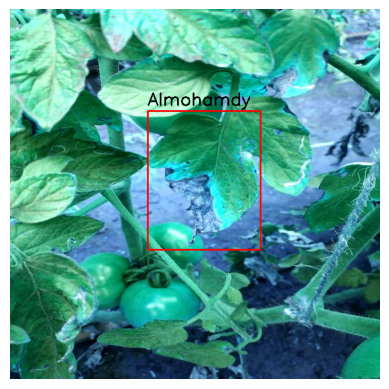

In [26]:
Display(image , 0.5249999999999999, 0.4625, 0.303125, 0.375 , annotation="Almohamdy" ,display='internal' )

In [27]:
re_image = Return_Detected_Image(image , 0.5249999999999999, 0.4625, 0.303125, 0.375 , annotation="Almohamdy" )
re_image.shape

(640, 640, 3)